In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import plotly.plotly as py
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import itertools
from collections import OrderedDict
import operator
import re
from math import sqrt
import pickle

# CARGA DE BASE DE DATOS

In [2]:
originaldb=pd.read_csv('./data.csv')
originaldb.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# INSPECCIÓN DE LA BASE DE DATOS

In [3]:
originaldb.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
originaldb.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [5]:
null_cols=originaldb.isnull().sum()
null_cols[null_cols>0]

Club                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
                            ... 
GKHandling                    48
GKKicking                     48
GKPositioning                 48
GKReflexes                    48
Release Clause              1564
Length: 76, dtype: int64

# CAMBIO DE NOMBRE DE COLUMNAS

In [6]:
originaldb = originaldb.rename(columns={'International Reputation': 'Inter_Rep'})
originaldb = originaldb.rename(columns={'HeadingAccuracy': 'HeadAccuracy'})
originaldb = originaldb.rename(columns={'ShortPassing': 'ShortPass'})
originaldb = originaldb.rename(columns={'LongPassing': 'LongPass'})
originaldb = originaldb.rename(columns={'Jersey Number': 'Jersey'})
originaldb = originaldb.rename(columns={'Value': 'Value(€M)'})
originaldb = originaldb.rename(columns={'Wage': 'Wage(€K)'})
originaldb = originaldb.rename(columns={'Release Clause': 'Release_Clause(€M)'})
originaldb = originaldb.rename(columns={'Contract Valid Until': 'Contract_Expiry'})
originaldb = originaldb.rename(columns={'Height': 'Height(cm)'})
originaldb = originaldb.rename(columns={'Weight': 'Weight(kgs)'})
originaldb = originaldb.rename(columns={'Skill Moves': 'SkillMoves'})

# CREACIÓN DEL DATA FRAME

In [7]:
fifadb=originaldb.drop(columns=['Flag','Body Type','Photo', 'Club Logo', 'Real Face', 'Loaned From'])

In [8]:
fifadb.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value(€M),Wage(€K),...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause(€M)
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# POBLANDO EL DATA FRAME

In [9]:
fifadb['Contract_Expiry'].fillna(2043, inplace = True)
fifadb['Joined'].fillna('Jan 1, 2019', inplace = True)
fifadb['Jersey'].fillna(8, inplace = True)
fifadb['Position'].fillna('ST', inplace = True)
fifadb['Club'].fillna('No Club', inplace = True)
fifadb['Work Rate'].fillna('Medium/Medium', inplace = True)
fifadb['Weak Foot'].fillna(3, inplace = True)
fifadb['Preferred Foot'].fillna('Right', inplace = True)
fifadb['Inter_Rep'].fillna(1, inplace = True)
fifadb['Wage(€K)'].fillna('€200K', inplace = True)
fifadb['Release_Clause(€M)'].fillna('€200K', inplace = True)
fifadb['Weight(kgs)'].fillna('169lbs', inplace = True)
fifadb['Height(cm)'].fillna("5'7", inplace = True)
fifadb['SkillMoves'].fillna(2, inplace = True)

In [10]:
x = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 
    'CAM', 'RAM','LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 
     'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB', 'RCB', 'RB']

In [11]:
def populate_position(x):
    for i in x:
        fifadb[i].fillna('50+1', inplace = True)
        
populate_position(fifadb[x])

In [12]:
y = ['FKAccuracy','Acceleration','SprintSpeed','Agility',
    'Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
     'Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
     'Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
     'GKPositioning','GKReflexes','ShortPass','Volleys','Dribbling','Curve',
    'LongPass','BallControl','HeadAccuracy','Finishing','Crossing',
    'FKAccuracy']

In [13]:
def populate_attributes(y):
    for i in y:
        fifadb[i].fillna(fifadb[i].mean(), inplace = True)
        
populate_attributes(fifadb[y])

Reorganizando las columnas del DataFrame para poder utilizarlas en gráficos de una manera más ordenada.

In [14]:
fifadb = fifadb[['ID','Name','Position','Age','Height(cm)','Weight(kgs)','Preferred Foot',
                 'Weak Foot','Nationality','Inter_Rep','Club','Joined','Jersey','Overall','Potential',
                 'Value(€M)','Wage(€K)','Contract_Expiry','Release_Clause(€M)','Special','SkillMoves',
                 'Work Rate','ShortPass','LongPass','ShotPower','LongShots','Penalties','Agility', 'Acceleration',
                 'SprintSpeed', 'Stamina','Strength','Reactions','Dribbling','BallControl', 'Aggression', 'Interceptions', 
                 'Positioning', 'Vision', 'Balance', 'Composure','Crossing', 'Finishing', 'Jumping','HeadAccuracy','Marking', 
                 'StandingTackle', 'SlidingTackle','GKDiving', 'Volleys',  'Curve', 'FKAccuracy','GKHandling', 
                 'GKKicking', 'GKPositioning','GKReflexes','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 
                 'CAM', 'RAM','LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB', 'RCB', 'RB']]
fifadb.head()

,ID,Name,Position,Age,Height(cm),Weight(kgs),Preferred Foot,Weak Foot,Nationality,Inter_Rep,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,RF,31,5'7,159lbs,Left,4.0,Argentina,5.0,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,20801,Cristiano Ronaldo,ST,33,6'2,183lbs,Right,4.0,Portugal,5.0,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,Neymar Jr,LW,26,5'9,150lbs,Right,5.0,Brazil,5.0,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,De Gea,GK,27,6'4,168lbs,Right,3.0,Spain,4.0,...,50+1,50+1,50+1,50+1,50+1,50+1,50+1,50+1,50+1,50+1
4,192985,K. De Bruyne,RCM,27,5'11,154lbs,Right,5.0,Belgium,4.0,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


Cambiando el pesos de los jugadores y transformarlo de libras a kilos.

In [15]:
fifadb['Weight(kgs)'] = fifadb['Weight(kgs)'].str.replace('lbs', '')

In [16]:
fifadb['Weight(kgs)'] = fifadb['Weight(kgs)'].apply(lambda x: int(x))

In [17]:
fifadb['Weight(kgs)'] = [x*0.453692 for x in fifadb['Weight(kgs)']]

Cambiando la estatura de los jugadores y transformado de pies a cms.

In [18]:
import re
z=[]
for e in fifadb['Height(cm)']:
    z.append(re.sub("'", ".", e))

In [19]:
fifadb['Height(cm)'] = z

In [20]:
fifadb['Height(cm)'] = fifadb['Height(cm)'].apply(lambda x: float(x))

In [21]:
fifadb['Height(cm)'] = fifadb['Height(cm)']/0.03281

Limpiando las variables de Valor de mercado, salario y cláusula de recisión de los jugadores.

In [22]:
fifadb['Release_Clause(€M)'] = fifadb['Release_Clause(€M)'].replace('€','')
fifadb['Release_Clause(€M)'] = fifadb['Release_Clause(€M)'].replace('‚Ç¨','')

In [23]:
fifadb['Release_Clause(€M)'] = fifadb['Release_Clause(€M)'].apply(lambda x: str(x))

In [24]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [25]:
fifadb['Value(€M)'] = fifadb['Value(€M)'].apply(lambda x: extract_value_from(x))
fifadb['Wage(€K)'] = fifadb['Wage(€K)'].apply(lambda x: extract_value_from(x))
fifadb['Release_Clause(€M)'] = fifadb['Release_Clause(€M)'].apply(lambda x: extract_value_from(x))

Debido a que la valoración de cada una de las posiciones contenidas en el juego se encuentra como un string del tipo '50+2'; es necesario separar dicho valor para poder realizar estadísitica inferencial y modelos de machine learning. Para ello, nos quedaremos con el primer elemento de cada string; es decir, nos quedaremos con el '50' y lo convertiremos en integer para poder manipularlo. Lo que sobre del string, lo descartaremos.

In [26]:
atts = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 
    'CAM', 'RAM','LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 
     'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB', 'RCB', 'RB']

In [27]:
def replace_plus(atts):
    for i in atts:
        fifadb[i] = fifadb[i].apply(lambda x: str(x).split('+')[0])
replace_plus(fifadb[atts])

Ahora regresaremos los valores de cada una de las posiciones a que sean números enteros para poder trabajar de manera correcta con ellos.

In [28]:
def convert_num(atts):
    for i in atts:
        fifadb[i] = fifadb[i].apply(lambda x: int(x))
convert_num(fifadb[atts])

Por otra parte, encontramos en la base de datos una columna que se define como el esfuerzo que ejecuta un jugador en términos de trabajo de ataque y defensa dentro del campo de juego. Sin embargo, al estar agrupado en un string definido como 'Work Rate' y dividido por un '/', es necesario crear 2 nuevas columnas que son: **'Work RAttack' y 'Work RDeffense'**.

In [29]:
fifadb['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', 'Medium/Medium'], dtype=object)

In [30]:
fifadb['Work RAttack'] = fifadb['Work Rate'].apply(lambda x: str(x).split('/')[0])

In [31]:
fifadb['Work RDefense'] = fifadb['Work Rate'].apply(lambda x: str(x).split('/')[1])

Para efectos de poder utilizar el año en los modelos de machine learning, se extrajo el año de los contratos vigentes de los jugadores.

In [32]:
fifadb['year_contractexp'] = pd.DatetimeIndex(fifadb['Contract_Expiry']).year
fifadb['month_contractexp'] = pd.DatetimeIndex(fifadb['Contract_Expiry']).month
fifadb['day_contractexp'] = pd.DatetimeIndex(fifadb['Contract_Expiry']).day

In [33]:
fifadb['year_contractexp'] = fifadb['year_contractexp'].apply(lambda x: int(x))
fifadb['month_contractexp'] = fifadb['year_contractexp'].apply(lambda x: int(x))
fifadb['day_contractexp'] = fifadb['year_contractexp'].apply(lambda x: int(x))

Ahora bien, para el mismo efecto que con los contratos, utilizaremos la información de años, meses y días para la fecha en la que el jugador llegó al Club en el que juega en Fifa 19.

In [34]:
fifadb['date_column'] = pd.DatetimeIndex(fifadb['Joined'])

In [35]:
fifadb['year_joined'] = pd.DatetimeIndex(fifadb['Joined']).year
fifadb['month_joined'] = pd.DatetimeIndex(fifadb['Joined']).month
fifadb['day_joined'] = pd.DatetimeIndex(fifadb['Joined']).day

In [36]:
fifadb['year_joined'] = fifadb['year_joined'].apply(lambda x: int(x))
fifadb['month_joined'] = fifadb['month_joined'].apply(lambda x: int(x))
fifadb['day_joined'] = fifadb['day_joined'].apply(lambda x: int(x))

Agregaremos la columna de continentes para efectos de clusterización de los clubes en un modelo no supervizado de machine learning.

In [37]:
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde',
                'Central African Rep.','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt',
                'Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',
                'Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar',
                'Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger',
                'Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone',
                'Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo',
                'Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Oceania' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau',
                 'Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu',
                'Australia','New Caledonia', 'New Zealand','Guam'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)',
              'Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq',
              'Israel','Japan','Jordan','Kazakhstan','Hong Kong','North Korea','South Korea','Korea Republic',
              'Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia',
              'Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation',
              'Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey',
              'Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina',
                'Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France',
                'Faroe Islands','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy',
                'Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova',
                'Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal',
                'Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden',
                'Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'America' : ['Antigua & Barbuda','Bermuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica',
                 'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica',
                 'Mexico','Nicaragua','Panama','St Kitts Nevis','St Lucia','Puerto Rico','Montserrat',
                 'Saint Vincent and the Grenadines','Trinidad and Tobago','United States','Argentina',
                 'Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru',
                 'Suriname','Trinidad & Tobago','Uruguay','Venezuela','São Tomé & Príncipe']}

In [38]:
def find_continent(x, continents_list):
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

fifadb['Continent'] = fifadb['Nationality'].apply(lambda x: find_continent(x, continents))

Generaremos 2 nuevas columnas dentro del DF para generar un diferencial entre el potencial de cada jugador y su valoración total. Por otra parte, a estos valores nos dirá si el jugador presenta una evolución futbolística **Pequeñas**. **Normales**, **Medianas** o **Grandes**. 

In [39]:
fifadb['Difference'] = fifadb['Potential']-fifadb['Overall']

def evolution(d):
    if d==0:
        return 'Normal'
    elif d>1 and d<=5:
        return 'Irrelevant'
    elif d>6 and d<=10:
        return 'Relevant'
    elif d>10:
        return 'Very Relevant'
    else:
        return 'Irrelevant'
   
 
fifadb['Evolution'] = fifadb['Difference'].apply(evolution)

In [40]:
fifadb = fifadb[['ID','Name','Position','Age','Height(cm)','Weight(kgs)','Preferred Foot',
                 'Weak Foot','Nationality','Continent','Inter_Rep','Club','Joined','year_joined','month_joined','day_joined','Jersey','Overall','Potential','Difference',
                 'Evolution','Value(€M)','Wage(€K)','Contract_Expiry','Release_Clause(€M)','Special','SkillMoves',
                 'Work Rate','Work RAttack','Work RDefense','ShortPass','LongPass','ShotPower','LongShots','Penalties','Agility', 'Acceleration',
                 'SprintSpeed', 'Stamina','Strength','Reactions','Dribbling','BallControl', 'Aggression', 'Interceptions', 
                 'Positioning', 'Vision', 'Balance', 'Composure','Crossing', 'Finishing', 'Jumping','HeadAccuracy','Marking', 
                 'StandingTackle', 'SlidingTackle','GKDiving', 'Volleys',  'Curve', 'FKAccuracy','GKHandling', 
                 'GKKicking', 'GKPositioning','GKReflexes','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 
                 'CAM', 'RAM','LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB', 'RCB', 'RB']]

In [41]:
null_cols=fifadb.isnull().sum()
null_cols[null_cols>0]

Series([], dtype: int64)

# DATAFRAME SURVIVAL ANALYSIS

Creamos una copia de la base de datos limpia para poder realizar el análisis de supervivencia de los jugadores en el juego de Fifa 19.

In [42]:
survival = fifadb.copy()

In [43]:
survival.to_csv('survival.csv', index=False)

# DATAFRAME RECOMMENDATION SYSTEM

Creamos una copia de la base de datos limpia para poder realizar un sistema de recomendación de los jugadores en el juego de Fifa 19.

In [44]:
recommend = fifadb.copy()

In [45]:
recommend.to_csv('recommend.csv', index=False)

# DATAFRAME UNSUPERVIZED MODEL

Creamos una copia de la base de datos limpia para poder realizar modelo no supervizado de machine learning para clusterizar los contenidos en el juego de Fifa 19.

In [46]:
unsupervized = fifadb.copy()

In [47]:
unsupervized.to_csv('unsupervized.csv', index=False)

# DATAFRAME SUPERVIZED MODEL

Creamos una copia de la base de datos limpia para poder realizar modelo supervizado de machine learning para pronosticar el valor de los jugadores los contenidos en el juego de Fifa 19.

In [48]:
prediction = fifadb.copy()

In [49]:
prediction.to_csv('prediction.csv', index=False)

# DATA FRAME SIN VACÍOS

In [50]:
null_cols=fifadb.isnull().sum()
null_cols[null_cols>0]

Series([], dtype: int64)

# INSIGHTS

Distribución de los jugadores en el juego. La principal posición que ocupan los jugadores son delanteros **'ST'**, seguido de porteros **'GK'** y defensores centrales **'CB'**.

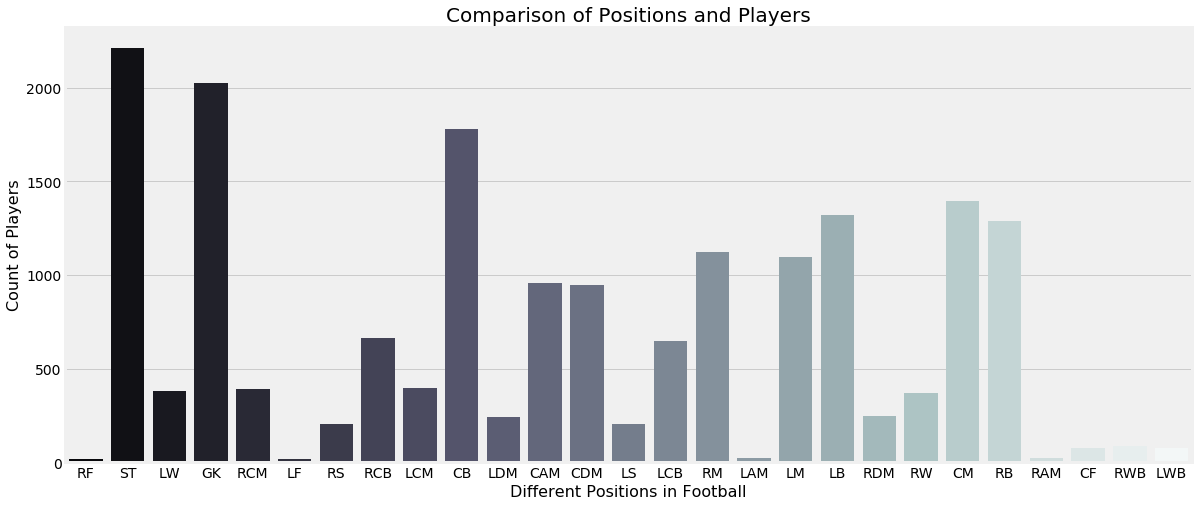

In [51]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot(fifadb['Position'], palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

Podemos observar que el pie preferido por los jugadores dentro del juego es el **Derecho**, a diferencia de los jugadores **Zurdos** en el juego. Esto no necesariamente implica que utilicen exclusivamente ese pie, simplemente se sienten más cómodos al realizar un pase, recepción o un tiro.

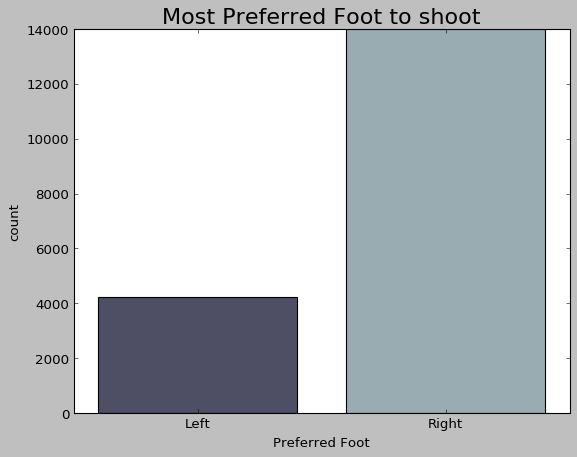

In [52]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('_classic_test')
sns.countplot(fifadb['Preferred Foot'], palette = 'bone')
plt.title('Most Preferred Foot to shoot', fontsize = 20)
plt.show()

Este gráfico nos muestra que la mayoría de los jugadores realizan, en promedio, el mismo esfuerzo al **atacar o defender**. Esto es lógico observarlo debido a que los jugadores cubren una posición en particular y, a menos que el equipo tuviera algún jugador lesiondo o expulsado, dicho esfuerzo se incrementaría para cubrir la vacante faltante. Si este no fuera el caso, ningún jugador se agotaría en el campo de juego intentando cubrir más de una posición.

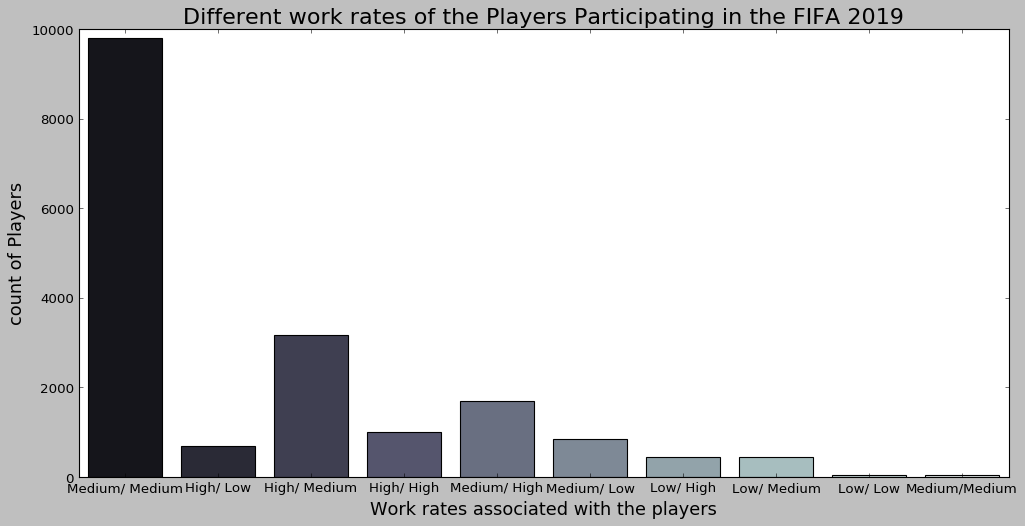

In [53]:
plt.figure(figsize = (15, 7))
plt.style.use('_classic_test')
sns.countplot(x = fifadb['Work Rate'], palette = 'bone')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

La diversidad de países presentes en el juego coincide con lo que observaríamos en la realidad. Sin embargo, es importante destacar que el juego se encuentra sesgado debido a que por razones comerciales, la cantidad de equipo contenidos se encuentran concentrados en **Inglaterra**, **Alemania**, **España**, **Argentina**, **Francia**, **Brasil** e **Italia**.

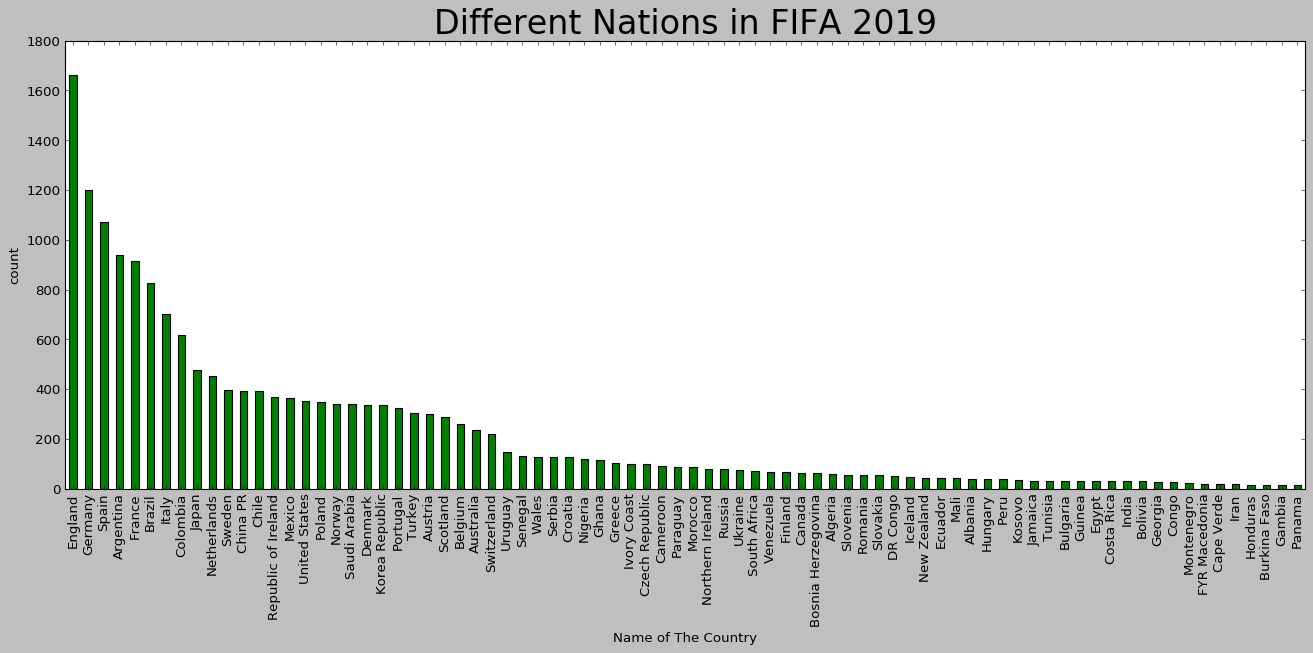

In [54]:
plt.style.use('_classic_test')
fifadb['Nationality'].value_counts().head(80).plot.bar(color = 'green', figsize = (20, 7))
plt.title('Different Nations in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

La distribución de la masa salarial se concentra en unos cuantos jugadores, los cuales denominaremos **Súper Estrellas**, por lo sin importar el país, posición o características físicas hace que pertenecer a este grupo genere una brecha salarial de cada 6 a 1 respecto un jugador promedio.

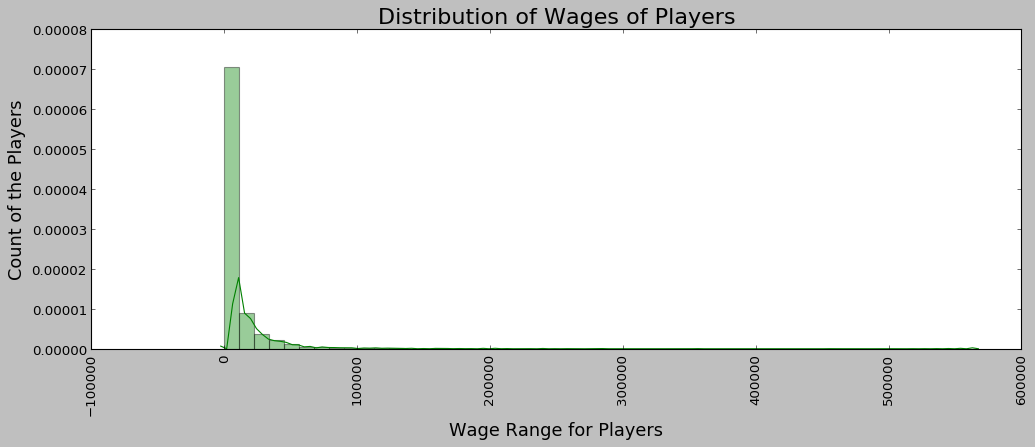

In [55]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(fifadb['Wage(€K)'], color = 'green')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Sobre el peso de los jugadores podemos observar que en promedio se encuentran en un rago de 70 a 80 kgs, lo cual podría, y con base en la estatura de los mismos, podría suponer una ventaja el ser más delgado que fornido para practicar este deporte.

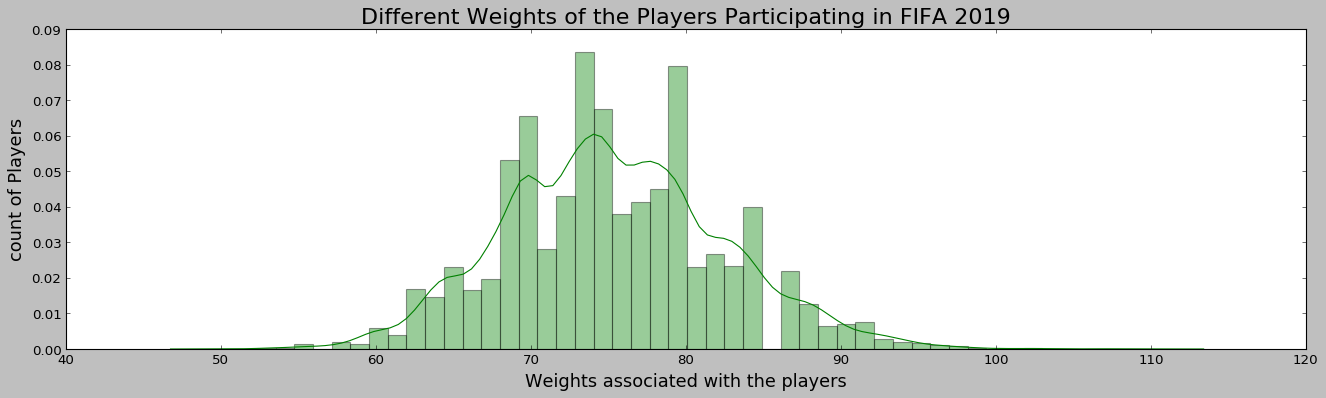

In [56]:
plt.figure(figsize = (20, 5))
plt.style.use('_classic_test')
sns.distplot(fifadb['Weight(kgs)'], color = 'green')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Weights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

En cuanto a la altura de los jugadores, podemos observar que la mayoría de los jugadores tiene una estatura menor al 1 metro 60 cms y realmente son pocos los jugadores que tiene una estatura cercana a los 2 metros.

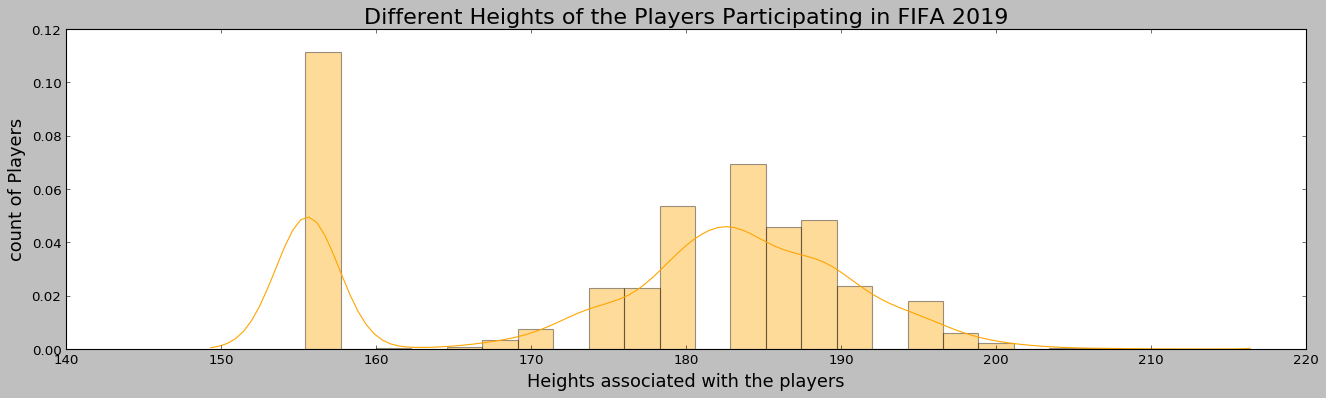

In [57]:
plt.figure(figsize = (20, 5))
plt.style.use('_classic_test')
sns.distplot(fifadb['Height(cm)'], color = 'orange')
plt.title('Different Heights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

Según los datos del juego, la mayoría de los jugadores no son tan habilidosos como se considerarían muchos. Es decir, sus habilidades son limitadas comparados con los jugadores que presentan una habilidad de 5 como podría ser **Messi o C. Ronaldo**

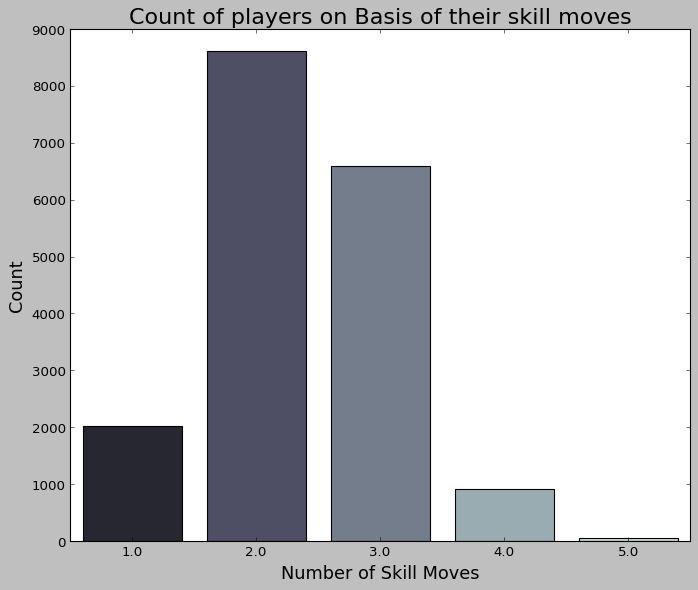

In [58]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = fifadb['SkillMoves'], palette = 'bone')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

La edad de los jugadores está principalmente concentrada en las **edades de 20 a 30 años**, aunque con la presencia de algunos jugadores muy jóvenes (16 años) o algunos más longevos (43 años) que están activos en la base de datos del juego.

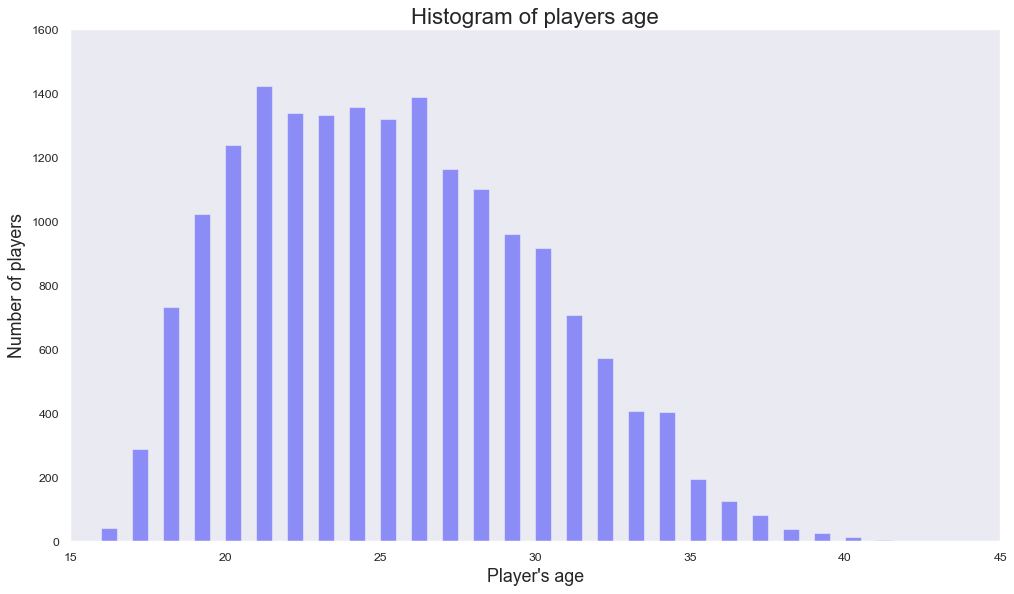

In [59]:
sns.set(style = "dark", palette = "bone", color_codes = True)
x = fifadb.Age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'b')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

En la siguiente gráfica podemos observar la distribución de los resultados que cada jugador tiene dentro del juego y que viene determinado en parte de sus habilidades y potencial de juego.

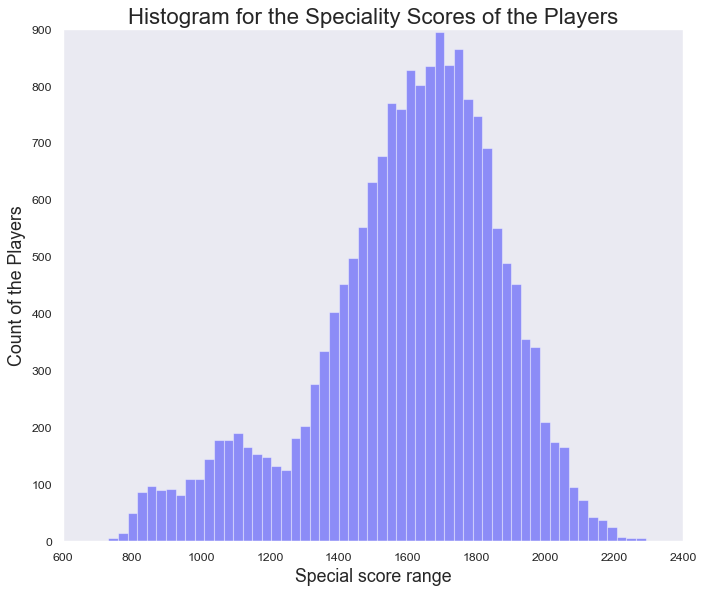

In [60]:
sns.set(style = 'dark', palette = 'bone', color_codes = True)
x = fifadb.Special
plt.figure(figsize = (10, 8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'b')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

En el siguiente gráfico podemos observar cómo se distruibuyen la masa de jugadores con base en el potencial que presentan en el juego, por lo que es importante resaltar que la mayoría tiene una valoración altamente subjetiva que muchas veces provoca que su valor en el mercado se encuentre determinado por factores externos y no elementos como **cantidad de partidos jugados, número de campeonatos, número de convocatorias internacionales, etc.**

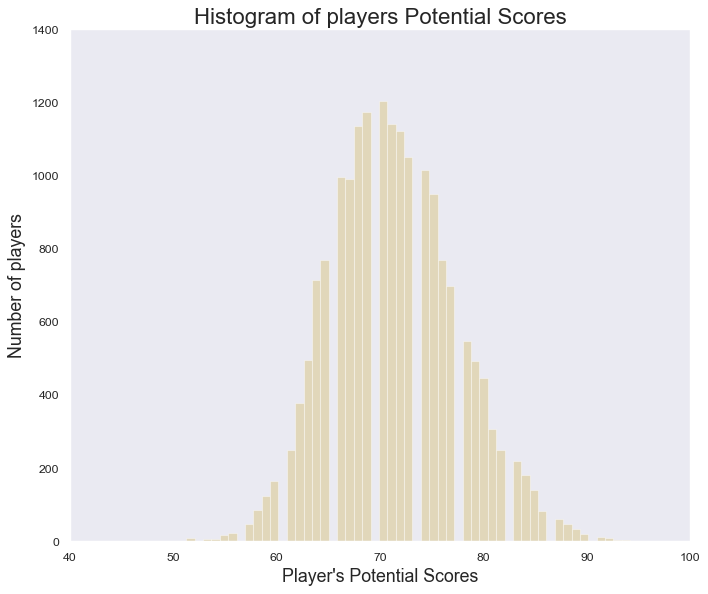

In [61]:
sns.set(style = "dark", palette = "muted", color_codes = True)
x = fifadb.Potential
plt.figure(figsize=(10,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

La siguiente gráfica muestra las correlaciones de todas algunas variables numéricas que tenemos dentro del DF. Por poner algunos ejemplos, el **Potencial** de un jugador está bastante correlacionado con **Overall** o valoración total del jugador o el **Valor de mercado** con el **Salario** que le pagan al jugador. 

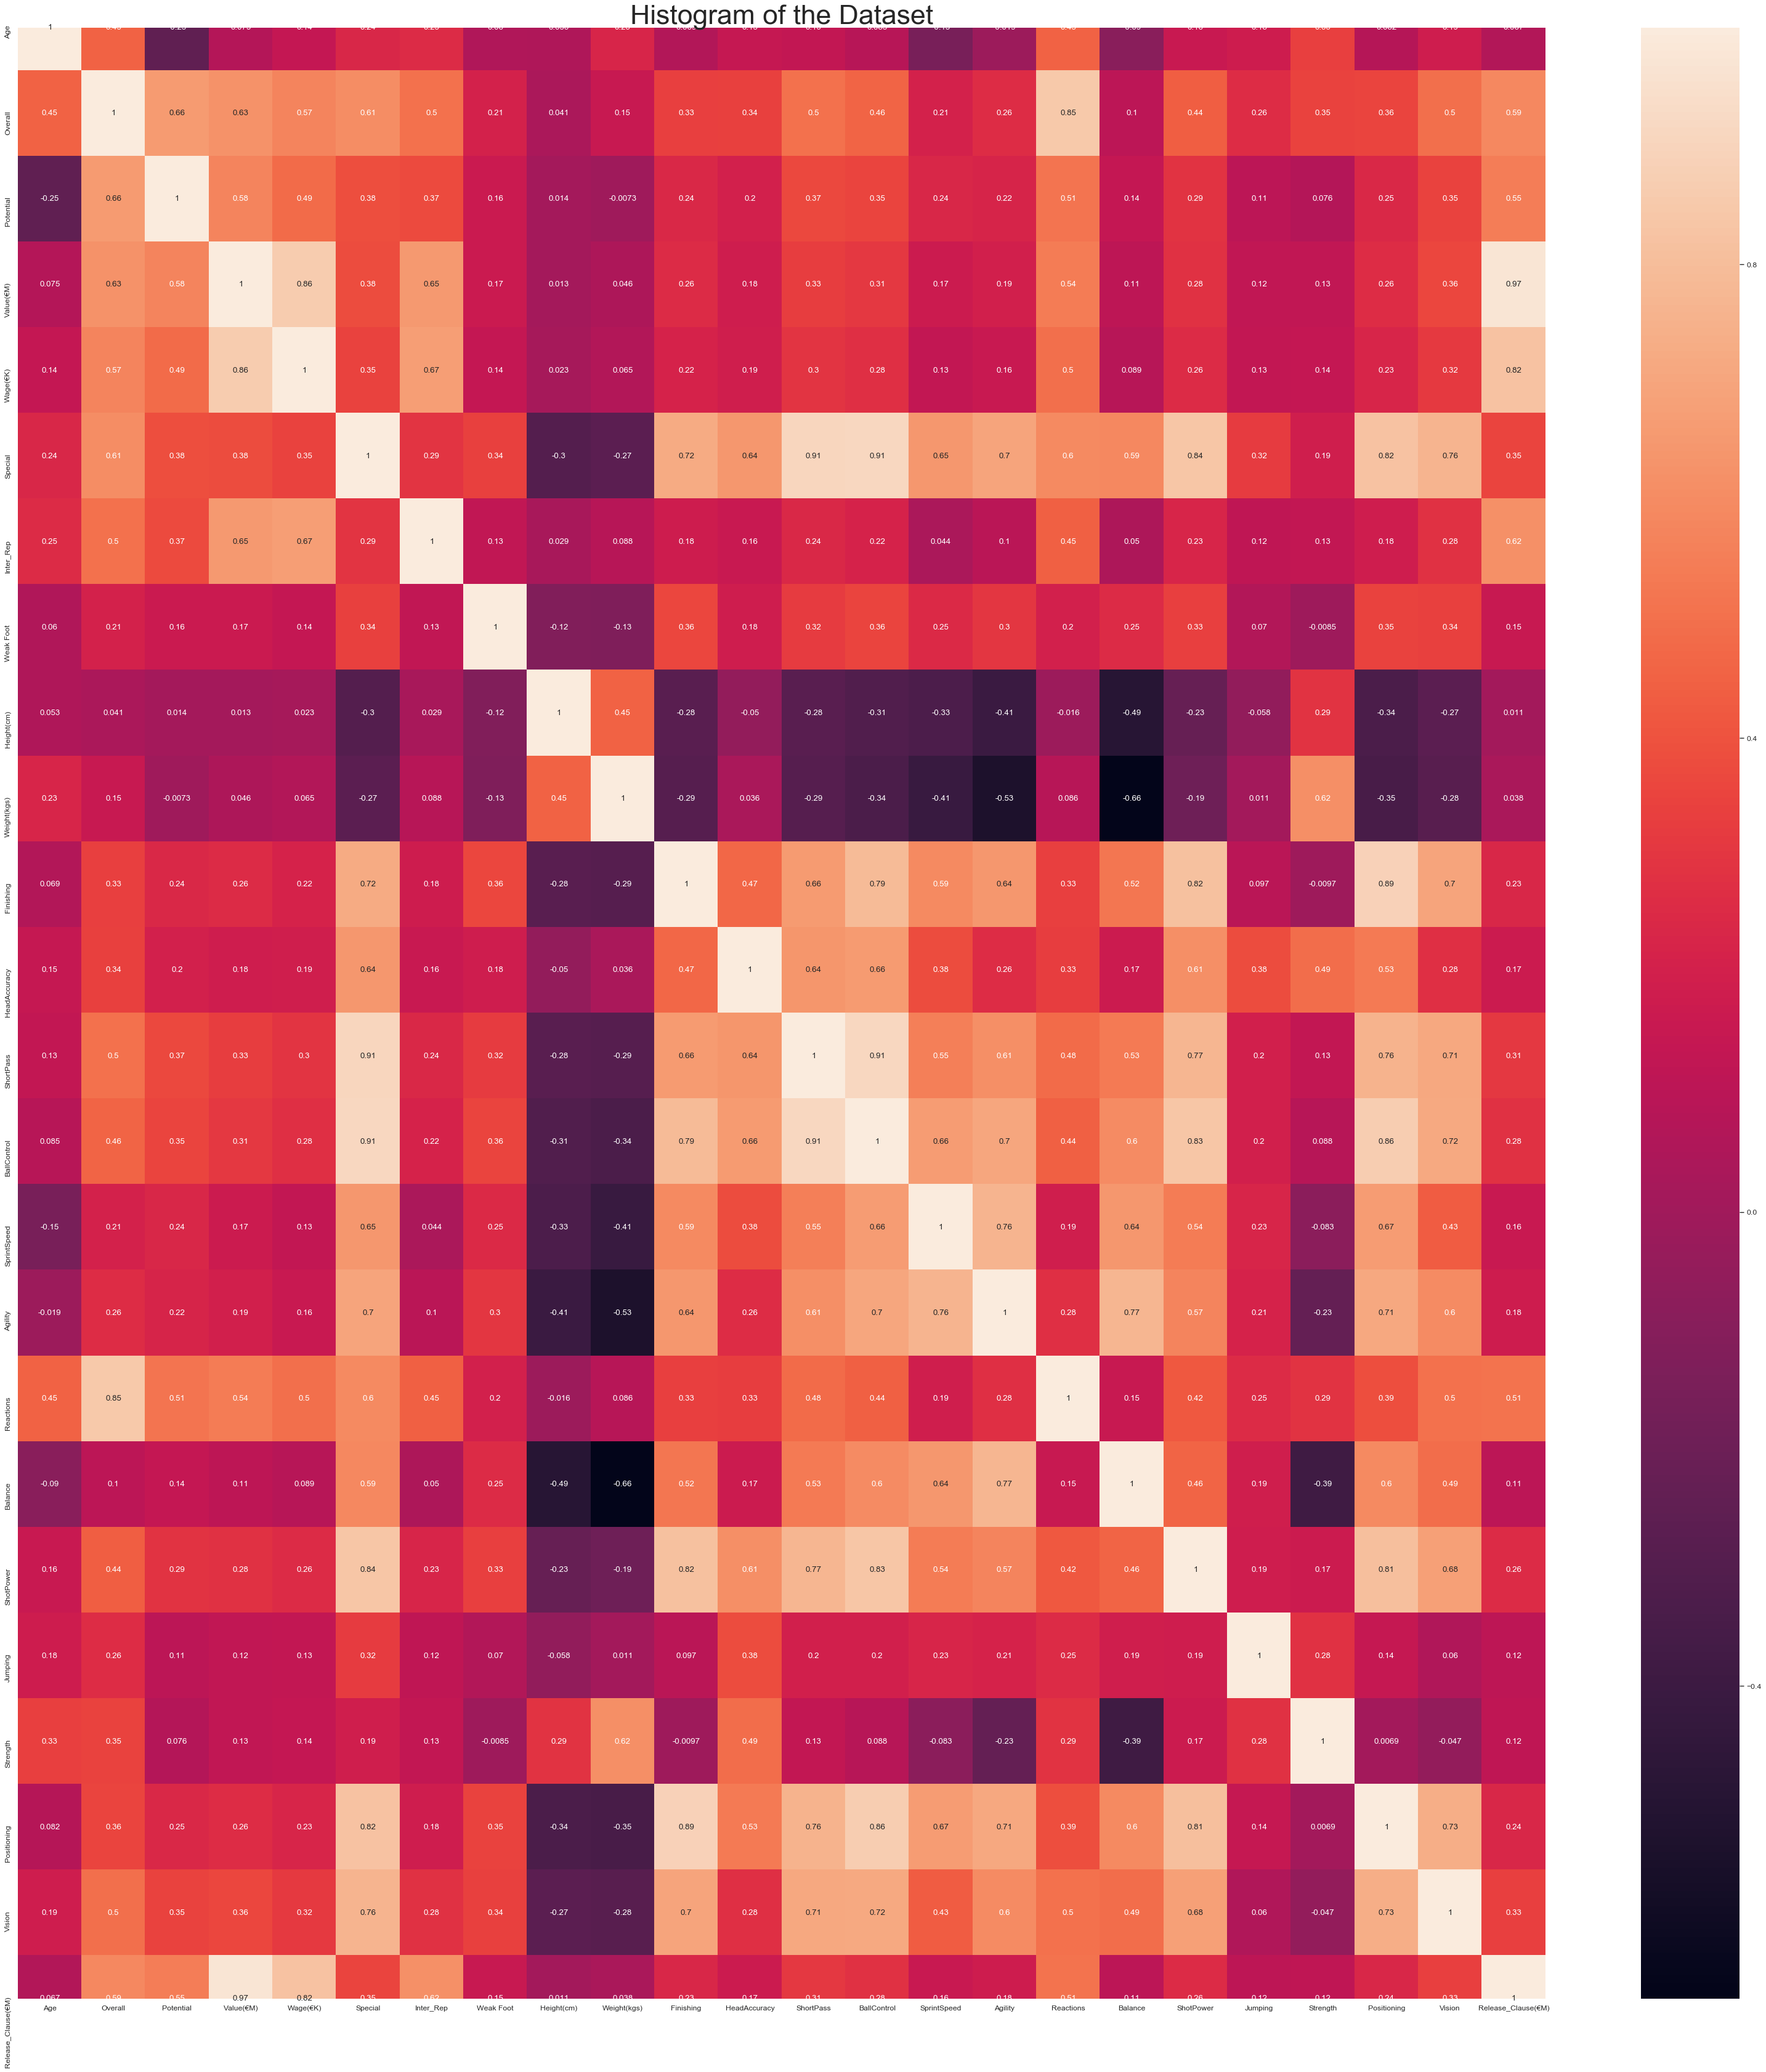

In [62]:
plt.rcParams['figure.figsize'] = (50, 50)
sns.heatmap(fifadb[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value(€M)',
                    'Wage(€K)', 'Special', 'Preferred Foot', 'Inter_Rep', 'Weak Foot',
                    'Work Rate', 'Position', 'Height(cm)', 'Weight(kgs)','Finishing', 
                    'HeadAccuracy', 'ShortPass','BallControl', 'SprintSpeed', 'Agility', 
                    'Reactions', 'Balance', 'ShotPower','Jumping','Strength', 'Positioning', 
                    'Vision','Release_Clause(€M)']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 40)
plt.show()

In [63]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadAccuracy', 'Interceptions', 'Jumping', 
                   'LongPass', 'LongShots', 'Marking', 'Penalties')

for i, val in fifadb.groupby(fifadb['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPass
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, Balance
Posi

La siguiente gráfica muestra qué tan equilibrado en cuanto a habilidades está cada una de las posiciones del juego. En particular, los jugadores que juegan como laterales parecen estar mucho más equilibrados en cuanto a sus habilidades. Esto hace sentido por la forma propia de la posición que participa como un **pivote** que permite ayudar al ataque o defender en caso de ser necesario.

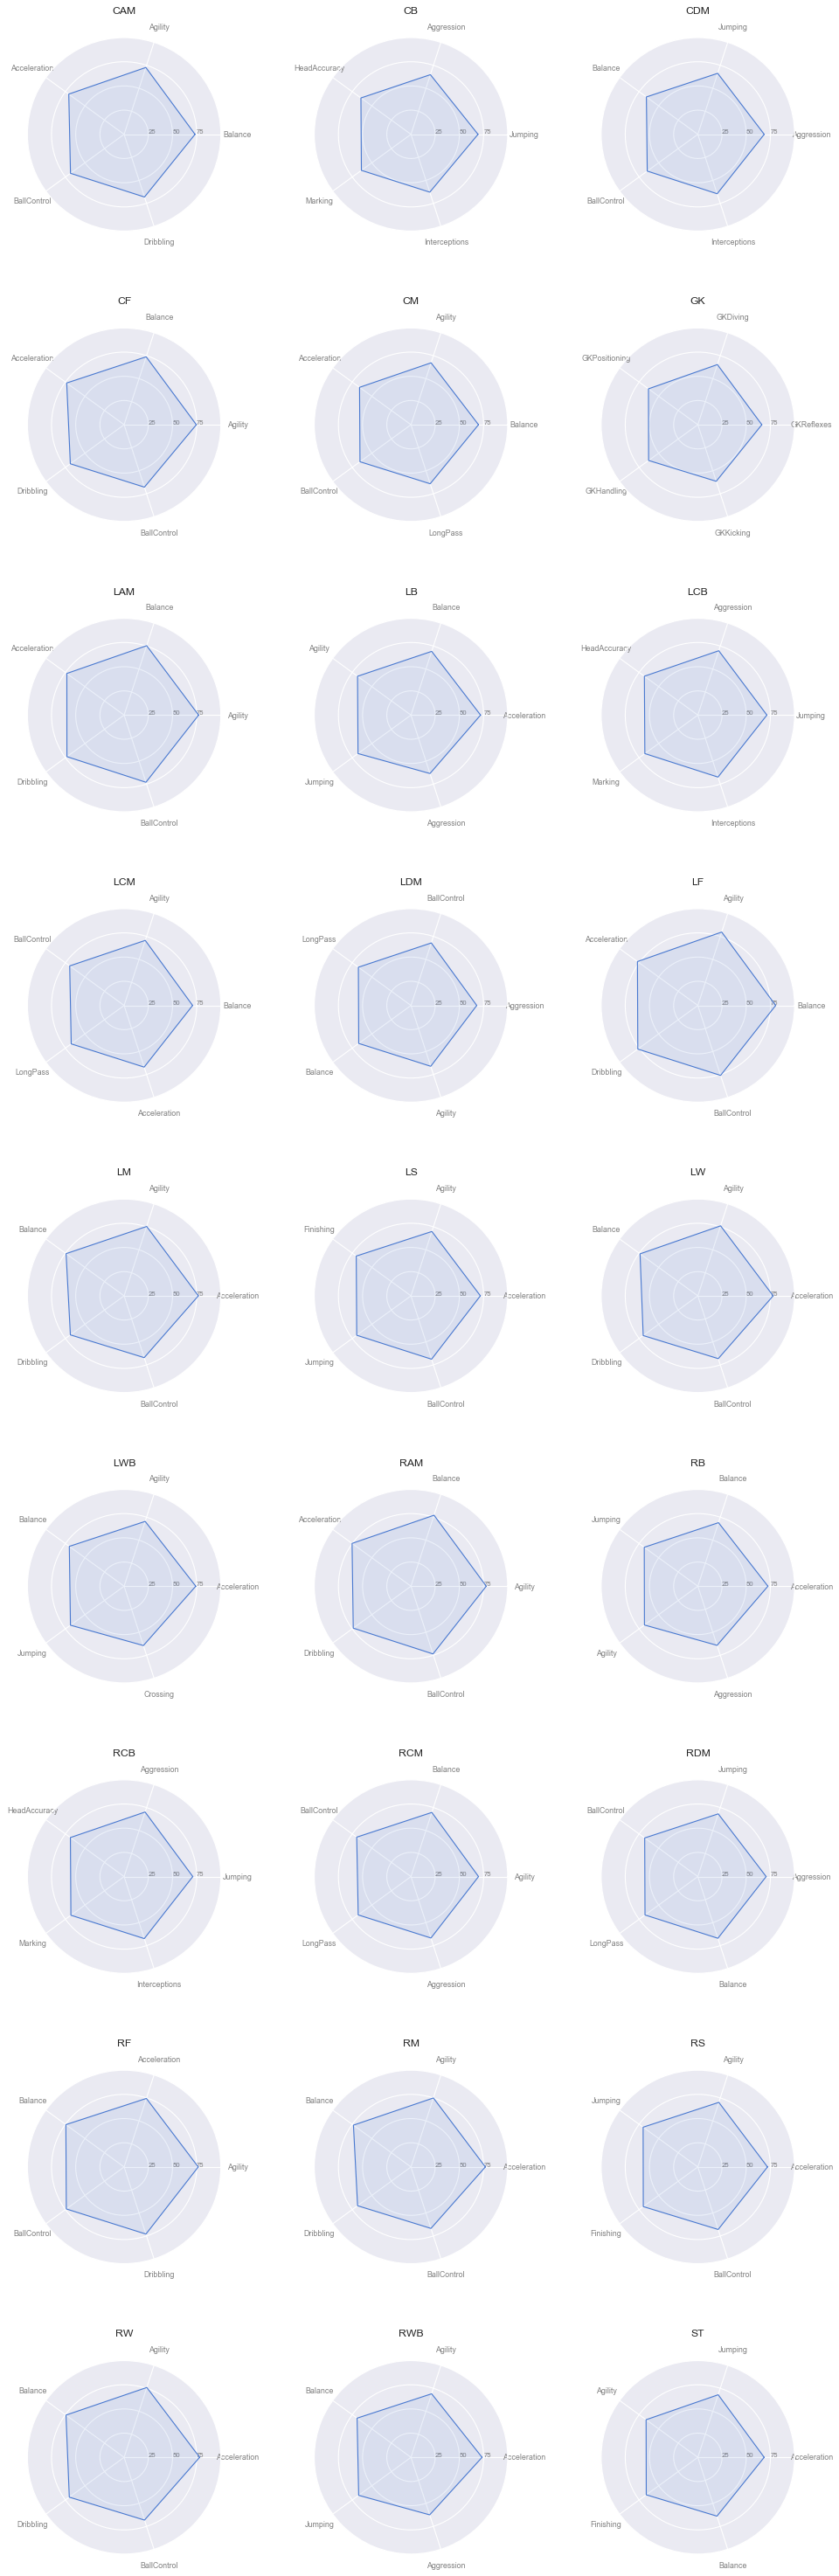

In [64]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in fifadb.groupby(fifadb['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

En cuanto a los resultados que los jugadores presenten por tipo de país, observamos que no se presenten grandes diferencias entre los países, lo que nos haría pensar que en promedio todos los jugadores comparten características similares y son realmente pocos los que destacan por encima del promedio.

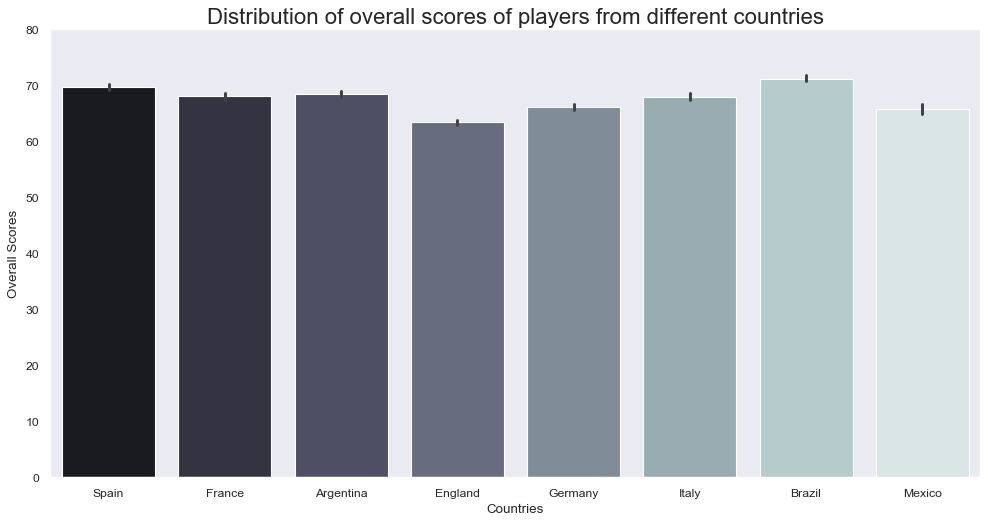

In [65]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Mexico')
data_countries = fifadb.loc[fifadb['Nationality'].isin(some_countries) & fifadb['Overall']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'bone')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 12)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

En la distribución de salarios de los jugadores que participan en el juego, resulta interesante que sea **Brasil** quien lidere dicha gráfica cuando se podría suponer que la **España**, al tener la liga con más **Súper Estrellas** o **Inglaterra** con la liga más **competitiva** podrían ser las que presentaran mayores diferencias salarias y no es así.

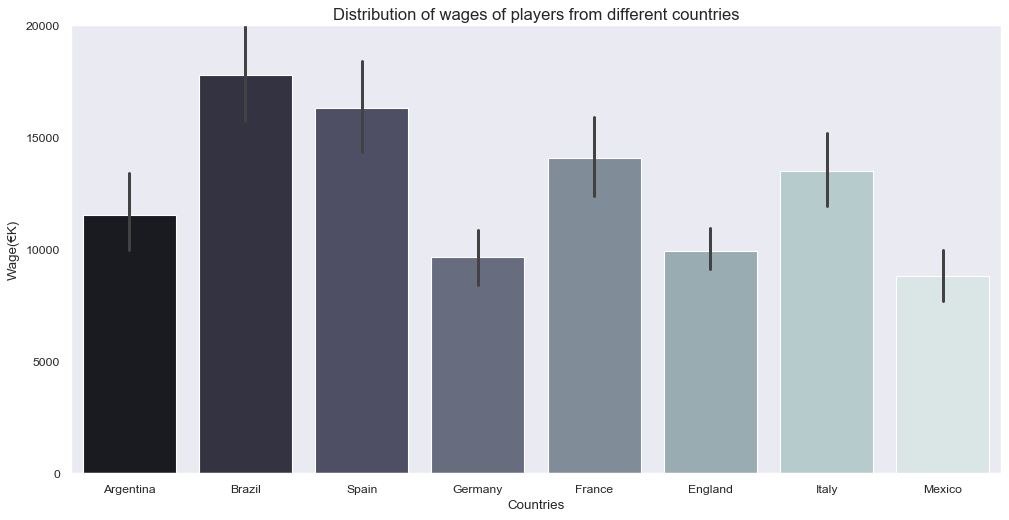

In [66]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Mexico')
data_countries = fifadb.loc[fifadb['Nationality'].isin(some_countries) & fifadb['Wage(€K)']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage(€K)'], palette = 'bone')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Wage(€K)', fontsize = 12)
ax.set_title(label = 'Distribution of wages of players from different countries', fontsize = 15)
plt.show()

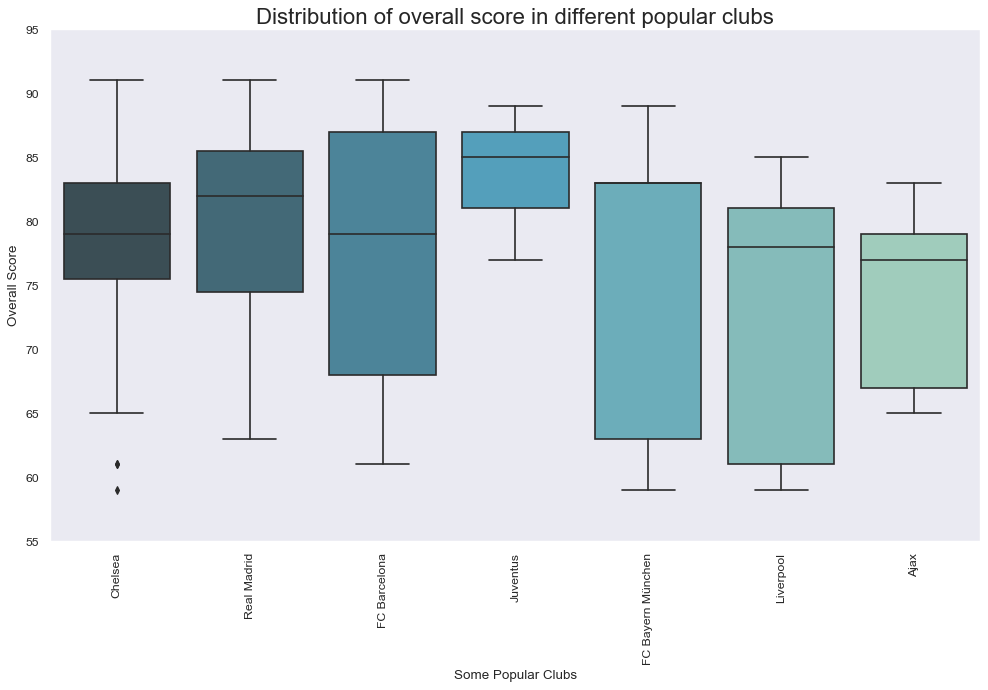

In [67]:
some_clubs = ('Real Madrid', 'FC Barcelona', 'Manchestar City', 'Liverpool', 'FC Bayern München', 'Manchestar City',
             'Juventus', 'FC Barcelona', 'PSG', 'Chelsea', 'Ajax')

data_clubs = fifadb.loc[fifadb['Club'].isin(some_clubs) & fifadb['Overall']]

plt.rcParams['figure.figsize'] = (15,8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'GnBu_d')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 12)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 12)
ax.set_title(label = 'Distribution of overall score in different popular clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

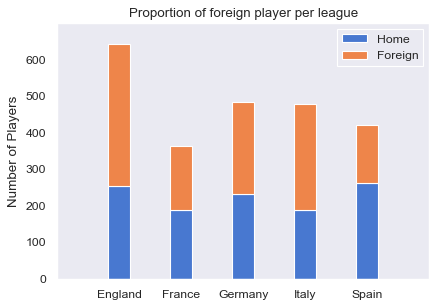

In [68]:
club_list_per_league = {
    'England' : ['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Leicester City', 'Southampton', 'Everton', 'Swansea City', 'Stoke City', 'West Ham United', 'Watford', 'Bournemouth', 'Crystal Palace', 'West Bromwich Albion', 'Burnley', 'Newcastle United', 'Brighton & Hove Albion', 'Huddersfield Town'],
    'France' : ['Paris Saint-Germain', 'AS Monaco', 'AS Saint-Étienne', 'Olympique de Marseille', 'Olympique Lyonnais', 'OGC Nice', 'Girondins de Bordeaux', 'Stade Rennais FC', 'Montpellier Hérault SC', 'FC Nantes', 'En Avant de Guingamp', 'Amiens SC Football', 'Dijon FCO', 'Angers SCO', 'LOSC Lille', 'RC Strasbourg', 'SM Caen', 'Toulouse FC', 'ES Troyes AC', 'FC Metz'],
    'Germany' : ['FC Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'RB Leipzig', 'Borussia Mönchengladbach', 'TSG 1899 Hoffenheim', 'SV Werder Bremen', 'VfL Wolfsburg', 'Hertha BSC Berlin', 'Eintracht Frankfurt', 'VfB Stuttgart', 'Eintracht Braunschweig', 'FC Augsburg', '1. FSV Mainz 05', 'Hamburger SV', 'Hannover 96', 'SC Freiburg'],
    'Italy' : ['Juventus', 'Milan', 'Napoli', 'Inter', 'Roma', 'Torino', 'Lazio', 'Genoa', 'Sassuolo', 'Sampdoria', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Bologna', 'Chievo Verona', 'Udinese', 'Cagliari', 'Ferrara (SPAL)', 'Crotone', 'Hellas Verona', 'Benevento Calcio'],
    'Spain' : ['Real Madrid CF', 'FC Barcelona', 'Atletico Madrid', 'Athletic Club de Bilbao','1. FC Köln', 'Villarreal CF', 'Real Sociedad', 'UD Las Palmas', 'RC Celta de Vigo', 'RCD Espanyol', 'SD Eibar', 'Valencia CF', 'Sevilla FC', 'RC Deportivo de La Coruña', 'Real Betis Balompié', 'Getafe CF', 'Girona CF', 'Deportivo Alav√©s', 'Levante UD', 'Deportivo Alavés', 'Málaga CF'],
}

two_columns = fifadb[['Nationality', 'Club']]

nationality_proportion = {'England' : [0, 0], 'France' : [0, 0], 'Germany' : [0, 0], 'Italy' : [0, 0], 'Spain' : [0, 0]}
def count_foreign_players():
    index = 0
    while (index < len(two_columns)):
        for country in club_list_per_league:
            if two_columns['Club'][index] in club_list_per_league[country]:
                if two_columns['Nationality'][index] == country:
                    nationality_proportion[country][0] = nationality_proportion[country][0] + 1
                else:
                    nationality_proportion[country][1] = nationality_proportion[country][1] + 1
        index += 1

count_foreign_players()
N = 5
home = (nationality_proportion['England'][0], nationality_proportion['France'][0], nationality_proportion['Germany'][0], nationality_proportion['Italy'][0], nationality_proportion['Spain'][0])
foreign = (nationality_proportion['England'][1], nationality_proportion['France'][1], nationality_proportion['Germany'][1], nationality_proportion['Italy'][1], nationality_proportion['Spain'][1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p1 = ax.bar(ind, home, width)
p2 = ax.bar(ind, foreign, width, bottom = home)
plt.ylabel('Number of Players')
plt.title('Proportion of foreign player per league')
plt.xticks(ind, ('England', 'France', 'Germany', 'Italy', 'Spain'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Home', 'Foreign'))
plt.show()

<Figure size 480x320 with 0 Axes>

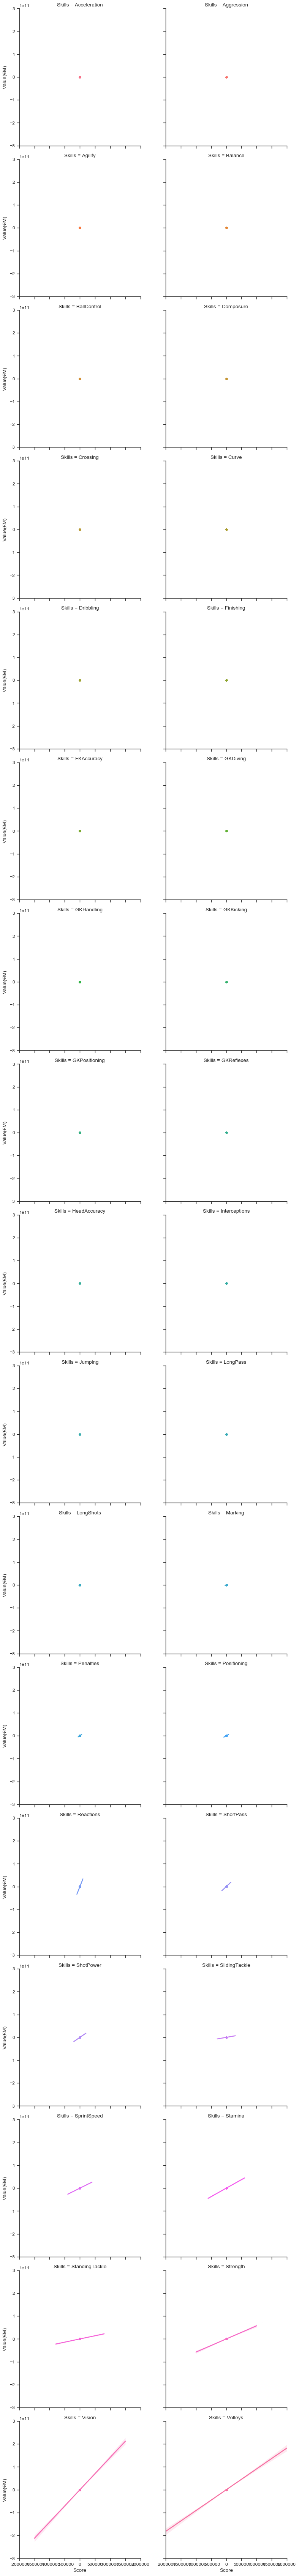

In [69]:
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[fifadb['Value(€M)'], fifadb['Acceleration'], fifadb['Aggression'], fifadb['Agility'], fifadb['Balance'],
                          fifadb['BallControl'], fifadb['Composure'],fifadb["Crossing"],fifadb['Curve'], fifadb['Dribbling'],
                          fifadb['Finishing'], fifadb['FKAccuracy'], fifadb['GKDiving'], fifadb['GKHandling'], fifadb['GKKicking'],
                          fifadb['GKPositioning'], fifadb['GKReflexes'], fifadb['HeadAccuracy'], fifadb['Interceptions'], fifadb['Jumping'],
                          fifadb['LongPass'], fifadb['LongShots'], fifadb['Marking'], fifadb['Penalties'], fifadb['Positioning'],
                          fifadb['Reactions'], fifadb['ShortPass'], fifadb['ShotPower'], fifadb['SlidingTackle'], fifadb['SprintSpeed'], 
                          fifadb['Stamina'], fifadb['StandingTackle'], fifadb['Strength'], fifadb['Vision'], fifadb['Volleys'] ], 
                    columns=["Value(€M)", "Acceleration", "Aggression", "Agility", "Balance", "BallControl", "Composure", "Crossing", "Curve", 
                             "Dribbling", "Finishing", "FKAccuracy", "GKDiving","GKHandling", "GKKicking", "GKPositioning", "GKReflexes", 
                             "HeadAccuracy", "Interceptions", "Jumping", "LongPass", "LongShots", "Marking", "Penalties", "Positioning",
                             "Reactions", "ShortPass", "ShotPower", "SlidingTackle", "SprintSpeed", "Stamina", "StandingTackle", "Strength", 
                             "Vision","Volleys"])

test = test.melt('Value(€M)', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value(€M)", x="Score", hue='Skills', col="Skills", data=test, col_wrap=2)
plt.show();

# Valor del equipo

El equipo más valioso dentro de la base de datos, lo cual está totalmente en línea con lo que podemos observar en la realidad, es que el **Real Madrid**, **Barcelona**, **M. City**, **Juventus** y **B. München** son los equipos más valiosos.

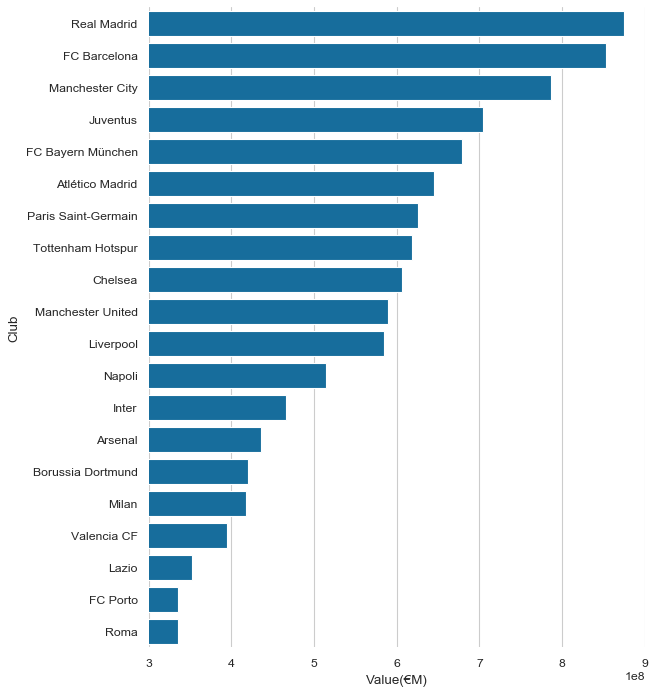

In [71]:
club_value = fifadb.groupby('Club')['Value(€M)'].sum()
club_value = club_value.reset_index()

sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(8, 10))
sns.set_color_codes('colorblind')
sns.barplot(y=club_value.nlargest(20, "Value(€M)")["Club"], x=club_value.nlargest(20, "Value(€M)")["Value(€M)"], data=club_value,
            label="Total", color="b")
ax.set(xlim=(3e8, 9e8))

sns.despine(left=True, bottom=True)

# Calidad de equipo

El equipo más valioso dentro de la base de datos podemos observar que la **Juventus** **Napoli **, **Inter**, **Real Madrid** y **Milán** son los equipos con mayor calidad. Esto no parece tener correspondencia con la realidad, pero quizás los jugadores **Súper estrellas** hacen que se pondere de diferente forma esta variable.

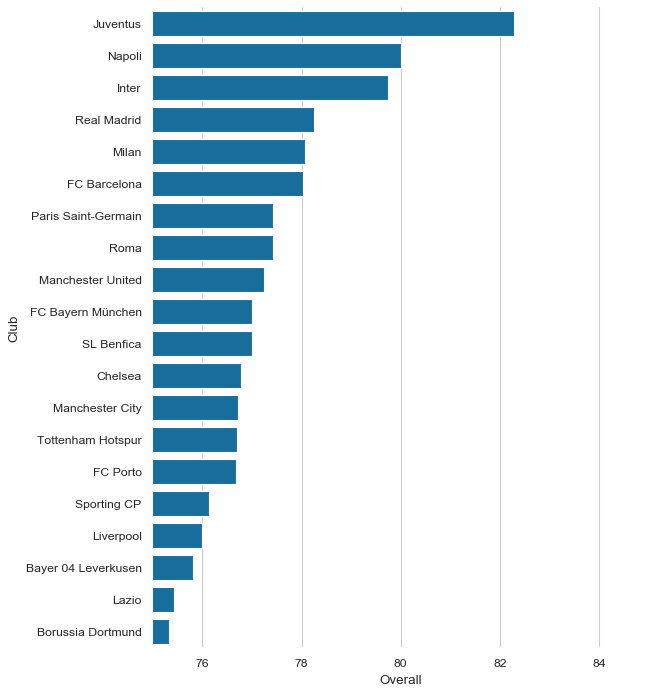

In [72]:
club_overall = fifadb.groupby("Club")["Overall"].mean()
club_overall = club_overall.reset_index()

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("colorblind")
sns.barplot(y=club_overall.nlargest(20, "Overall")["Club"], x=club_overall.nlargest(20, "Overall")["Overall"], data=club_overall,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

# Potencial del equipo

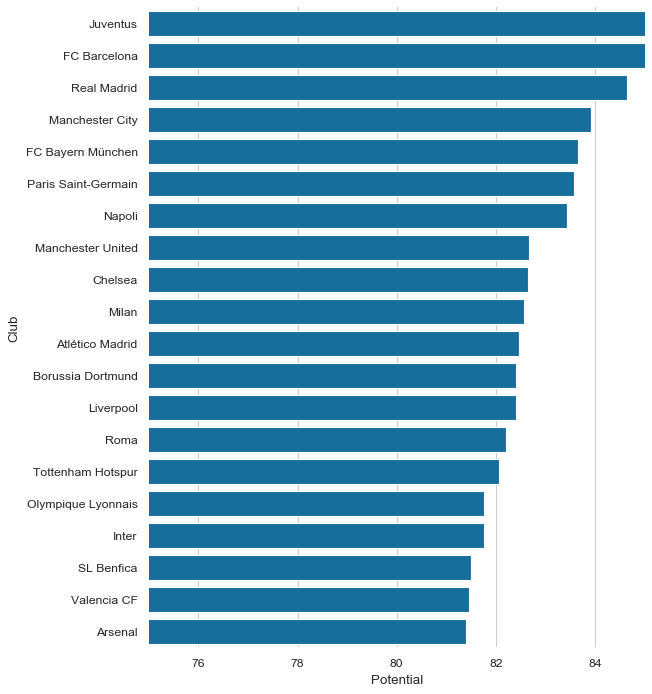

In [73]:
club_potential = fifadb.groupby("Club")["Potential"].mean()
club_potential = club_potential.reset_index()

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("colorblind")
sns.barplot(y=club_potential.nlargest(20, "Potential")["Club"], x=club_potential.nlargest(20, "Potential")["Potential"], data=club_potential,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

# ANÁLISIS DE INFORMACIÓN

In [74]:
fifadb['Club'].value_counts()

No Club            241
Atlético Madrid     33
Valencia CF         33
Liverpool           33
Real Madrid         33
                  ... 
Chapecoense         20
Santos              20
Limerick FC         19
Sligo Rovers        19
Derry City          18
Name: Club, Length: 652, dtype: int64

In [75]:
fifadb.groupby(fifadb['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

In [76]:
fifadb.iloc[fifadb.groupby(fifadb['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


In [77]:
fifadb.iloc[fifadb.groupby(fifadb['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany


In [78]:
eldest = fifadb.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [79]:
youngest = fifadb.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [80]:
fifadb[fifadb['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


In [81]:
fifadb[fifadb['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


In [82]:
promising = fifadb.loc[(fifadb['Evolution']== 'Large') & (fifadb['Potential']>85)].sort_values(by='Potential', ascending=False)[:10]

In [83]:
#Salarios totales por club
salarios_club = fifadb.groupby('Club')['Wage(€K)'].sum()
salarios_club.head()

Club
 SSV Jahn Regensburg     123000.0
1. FC Heidenheim 1846    125000.0
1. FC Kaiserslautern      44000.0
1. FC Köln               372000.0
1. FC Magdeburg          127000.0
Name: Wage(€K), dtype: float64

In [84]:
players_club = fifadb.groupby('Club')['Name'].count()
players_club.head()

Club
 SSV Jahn Regensburg     29
1. FC Heidenheim 1846    28
1. FC Kaiserslautern     26
1. FC Köln               28
1. FC Magdeburg          26
Name: Name, dtype: int64

In [85]:
#Número de clubs
print('Number of clubs is {}'.format(fifadb.shape[0]))

#Promedio de jugadores por club
print('Average number players in each club is {}'.format(round(fifadb['Age'].mean(),2)))

#Salarios promedios
print('Total Average wage(K) by potential ratio is {} (€K)'
      .format(round(fifadb['Wage(€K)'].sum()*1000 / fifadb['Potential'].sum(), 2)))

Number of clubs is 18207
Average number players in each club is 25.12
Total Average wage(K) by potential ratio is 136470.07 (€K)


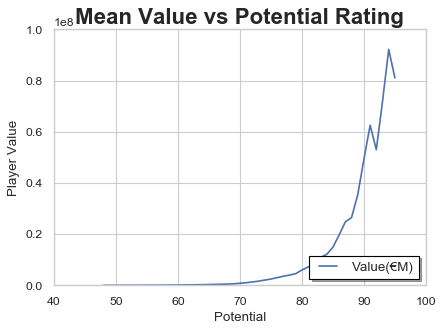

In [86]:
#Potential and Value
# Selecting unique Age from DataFrame
potential = fifadb.sort_values("Potential")['Potential'].unique()
# Selecting mean Overall from DataFrame
overall = fifadb.sort_values("Overall")['Overall'].unique()
# Selecting mean value from DataFrame
value = fifadb.groupby("Potential")["Value(€M)"].mean().values

plt.figure(figsize=(6,4))
plt.title('Mean Value vs Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Potential', fontsize=12)
plt.ylabel('Player Value', fontsize=12)
sns.set_style("whitegrid")
plt.plot(potential, value, label="Value(€M)")
plt.legend(loc=4, prop={'size': 12}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

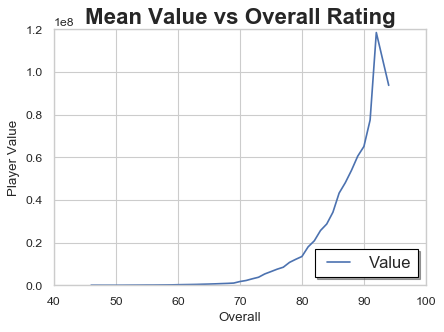

In [87]:
#Overall and Value
# Selecting unique Age from DataFrame
overall = fifadb.sort_values("Overall")['Overall'].unique()
# Selecting mean Overall from DataFrame
value = fifadb.groupby("Overall")["Value(€M)"].mean().values

plt.figure(figsize=(6,4))
plt.title('Mean Value vs Overall Rating', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=12)
plt.ylabel('Player Value', fontsize=12)
sns.set_style("whitegrid")
plt.plot(overall, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

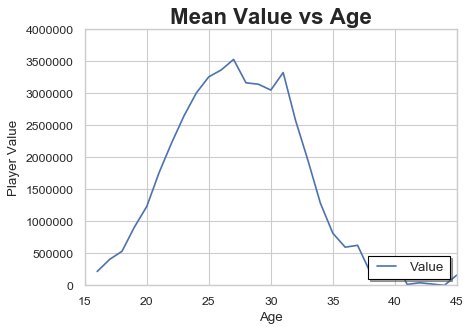

In [88]:
#Age and value
# Selecting unique Age from DataFrame
age = fifadb.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
value = fifadb.groupby("Age")["Value(€M)"].mean().values

plt.figure(figsize=(6,4))
plt.title('Mean Value vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Player Value', fontsize=12)
sns.set_style("whitegrid")
plt.plot(age, value, label="Value")
plt.legend(loc=4, prop={'size': 12}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

# ESTADÍSTICA

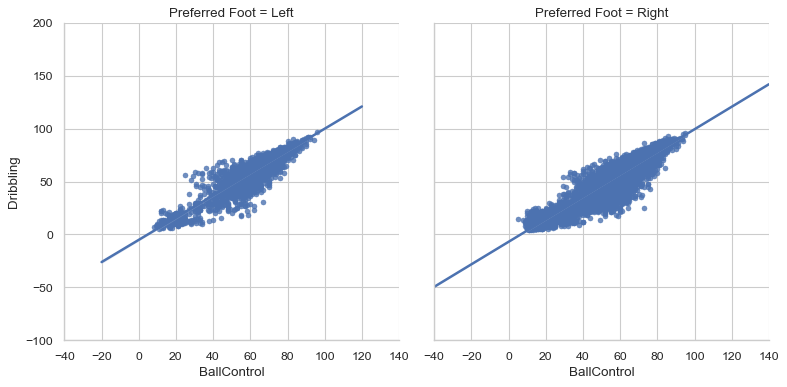

In [89]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = fifadb, col = 'Preferred Foot')

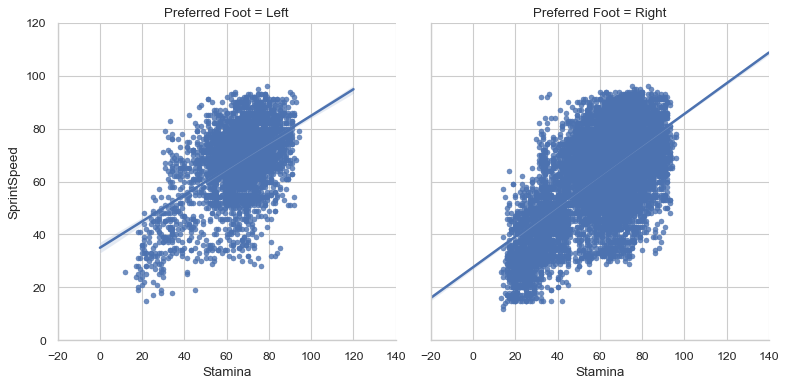

In [90]:
sns.lmplot(x = 'Stamina', y = 'SprintSpeed', data = fifadb, col = 'Preferred Foot')

In [91]:
cols  = ['Name','Club','Overall','Age','Potential','Value(€M)']
promising[cols]

,Name,Club,Overall,Age,Potential,Value(€M)


# RECOMMENDER SYSTEM

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

StandardScaler() will normalize the features (each column of X) so that each column/feature/variable will have mean = 0 and standard deviation = 1

In [93]:
data = pd.read_csv('./data.csv')

In [94]:
attributes = data.iloc[:, 54:83]
attributes['Skill Moves'] = data['Skill Moves']
workrate = data['Work Rate'].str.get_dummies(sep='/ ')
attributes = pd.concat([attributes, workrate], axis=1)
df = attributes
attributes = attributes.dropna()
df['Name'] = data['Name']
df = df.dropna()
print(attributes.columns)

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Skill Moves', 'High', 'Low', 'Medium'],
      dtype='object')


In [95]:
scaled = StandardScaler()
X = scaled.fit_transform(attributes)

In [96]:
recommendations = NearestNeighbors(n_neighbors=6,algorithm='ball_tree')
recommendations.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [97]:
player_index = recommendations.kneighbors(X)[1]

In [98]:
player_index

array([[    0,     5,    15,     2,   236,    84],
       [    1,   124,   170,    17,   713,    93],
       [    2,     5,    15,    65,    25,    68],
       ...,
       [18156, 18015, 17154, 17956, 17994, 17968],
       [18157, 17868, 18071, 17493, 17969, 18041],
       [18158, 17869, 18042, 18086, 17888, 17467]])

In [99]:
def get_index(x):
    return df[df['Name']==x].index.tolist()[0]

def recommend_me(player):
    print("5 Players similar to {} are: ".format(player))
    index = get_index(player)
    for i in player_index[index][1:]:
        print(df.iloc[i]['Name'])

In [100]:
#player = input()

In [101]:
#recommend_me(player)

In [102]:
#player = input()

In [103]:
#recommend_me(player)

In [104]:
#df['Name']

In [105]:
#player = input()

In [106]:
#recommend_me(player)